# Разработка модели эффективного воспроизводства молочного стада хозяйства «Вольный луг»

## Описание проекта
По просьбе владелца молочного хозяйства «Вольный луг» необходимо разработать модель эффективного воспроизводства его молочного стада. Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».   \
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!
Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1.	Первая будет прогнозировать возможный удой у коровы (целевой признак Удой)
2.	Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока)

С помощью модели нужно отобрать коров по двум критериям:  
- Средний удой за год — не менее 6000 килограммов
- Молоко должно быть вкусным

## Описание данных:

id — уникальный идентификатор коровы.

Удой, кг — масса молока, которую корова даёт в год (в килограммах).

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

Сырой протеин, г — содержание сырого протеина в корме (в граммах).

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Жирность,% — содержание жиров в молоке (в процентах).

Белок,% — содержание белков в молоке (в процентах).

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**Признаки в датасете ferma_main.csv можно разделить на группы.**

Характеристики коровы: id, Порода, порода папы_быка, Возраст.

Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).

Характеристика пастбища: Тип пастбища.

Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.




**Файл ferma_dad.csv. Описание данных:**

id — уникальный идентификатор коровы.

Имя Папы — имя папы коровы.



**Файл cow_buy.csv.Описание данных:**

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Имя_папы — имя папы коровы.

Текущая_жирность,% — содержание жиров в молоке (в процентах).

Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## 1. Импорт библиотек

In [ ]:
!pip install phik -q 
!pip install shap -q 

#ИЛИ

# !pip install -r requirements.txt
# при необходимости можно запустить данную команду, для установки версий библиотек,
#которые использовались при использовании данного проекта
# и с которыми не возникали конфликты

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats    

from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV
                                    )
from sklearn.preprocessing import (StandardScaler, 
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   MinMaxScaler
                                  )
from sklearn.linear_model import (LinearRegression, 
                                  LogisticRegression
                                 )
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             mean_absolute_error, 
                             mean_squared_error,
                             precision_score,
                             recall_score,
                             r2_score
                            )
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score
import phik
import shap

In [ ]:
#Обязательно после обновления библиотеки перезапустите все, а то не будет работать(
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
pip install -q --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


### 1.1 Чтение данных

In [ ]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
    
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [ ]:
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
    
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### 1.2 Изучение данных

#### 1.2.1 Изучение датасета ferma_main.csv

In [ ]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

В таблице отсутствуют пропуски. Изменим названия столбцов в соответствии с правилами хорошего стиля.

In [ ]:
ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [ ]:
ferma_main.rename(columns={
    'id': 'id',
    'Удой, кг': 'yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
    'Сырой протеин, г': 'crude_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Жирность,%': 'fat_percent',
    'Белок,%': 'protein_percent',
    'Вкус молока': 'milk_flavor',
    'Возраст': 'age'
}, inplace=True)
ferma_main.columns

Index(['id', 'yield_kg', 'energy_feed_unit', 'crude_protein_g',
       'sugar_protein_ratio', 'breed', 'pasture_type', 'sire_breed',
       'fat_percent', 'protein_percent', 'milk_flavor', 'age'],
      dtype='object')

#### 1.2.2 Изучение датасета ferma_dad.csv

In [ ]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


В таблице также отсутствуют пропуски. Приведем названия столбцов в соответствии с правилами хорошего стиля.

In [ ]:
ferma_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [ ]:
ferma_dad.rename(columns={
    'id': 'id',
    'Имя Папы': 'dad_name'
}, inplace=True)
ferma_dad.columns

Index(['id', 'dad_name'], dtype='object')

#### 1.2.3 Изучение датасета cow_buy.csv

In [ ]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


В данном датасете пропуски также отсутствуют. Приведем названия столбцов в соответствии с правилами хорошего стиля.

In [ ]:
cow_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [ ]:
cow_buy.rename(columns={
    'Порода': 'breed', 
    'Тип пастбища': 'pasture_type', 
    'порода папы_быка': 'sire_breed', 
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'fat_percent', 
    'Текущий_уровень_белок,%': 'protein_percent', 
    'Возраст': 'age'
}, inplace=True)
cow_buy.columns

Index(['breed', 'pasture_type', 'sire_breed', 'dad_name', 'fat_percent',
       'protein_percent', 'age'],
      dtype='object')

#### Выводы после ознакомления с данными:

В проекте имеется 3 датасета: ferma_main, ferma_dad, cow_buy. Данные датасеты имеют 634, 629 и 20 строк соответственно. Во всех датасетах пропуски отсутствуют, данные полные. Однако наименования столбцов не соответствовали правилам хорошего стиля. В последнем датасете столбцы были названы соответственно датасетам 1 и 2, чтобы в дальнейшем можно было разрабатывать модель МО.

В датасете присутствуют неправильные типы данных, поэтому на этапе предобработки будем менять типы данных на верные.

В датасете ferma_main это:

- energy_feed_unit (должно быть float, указан object)
- sugar_protein_ratio (должно быть float, указан object)
- fat_percent (должно быть float, указан object)
- protein_percent (должно быть float, указан object)

В датасете cow_buy:

- fat_percent (должно быть float, указан object)
- protein_percent (должно быть float, указан object)

###  2. Предобработка данных

#### 2.1 Датасет ferma_main.csv

In [ ]:
print ('Количество явных дубликатов в `ferma_main.csv` = ', ferma_main.duplicated().sum())
#В датасете присутствуют явные дубликаты, которые нужно будет удалить.

Количество явных дубликатов в `ferma_main.csv` =  5


In [ ]:
#Так как ранее было выявлено, что в датасете необходимо сменить тип данных в некоторых строках, то сделаем следующее:
ferma_main['energy_feed_unit'] = ferma_main['energy_feed_unit'].str.replace(',','.')
ferma_main['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].str.replace(',','.')
ferma_main['fat_percent'] = ferma_main['fat_percent'].str.replace(',','.')
ferma_main['protein_percent'] = ferma_main['protein_percent'].str.replace(',','.')
ferma_main[['energy_feed_unit', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']] = \
ferma_main[['energy_feed_unit', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']].astype('float')
ferma_main.dtypes

id                       int64
yield_kg                 int64
energy_feed_unit       float64
crude_protein_g          int64
sugar_protein_ratio    float64
breed                   object
pasture_type            object
sire_breed              object
fat_percent            float64
protein_percent        float64
milk_flavor             object
age                     object
dtype: object

In [ ]:
ferma_main=ferma_main.drop_duplicates()
print ('Количество явных дубликатов в `ferma_main.csv` = ', ferma_main.duplicated().sum())

Количество явных дубликатов в `ferma_main.csv` =  0


#### 2.2 Датасет ferma_dad.csv

In [ ]:
print ('Количество явных дубликатов в `ferma_dad.csv` = ', ferma_dad.duplicated().sum())

Количество явных дубликатов в `ferma_dad.csv` =  0


In [ ]:
ferma_dad.dtypes

id           int64
dad_name    object
dtype: object

#### 2.3 Датасет cow_buy.csv

In [ ]:
print ('Количество явных дубликатов в `cow_buy.csv` = ', cow_buy.duplicated().sum())

Количество явных дубликатов в `cow_buy.csv` =  4


Хоть дубликаты и присутствуют, но мы удалять их  не будем, так как это всё же данные на основании которых модель МО будет строить прогнозы.

В следующем шаге изменим тип данных двух столбцом на верные

In [ ]:
cow_buy['fat_percent'] = cow_buy['fat_percent'].str.replace(',','.')
cow_buy['protein_percent'] = cow_buy['protein_percent'].str.replace(',','.')
cow_buy[['fat_percent', 'protein_percent']] = cow_buy[['fat_percent', 'protein_percent']].astype('float')
cow_buy.dtypes

breed               object
pasture_type        object
sire_breed          object
dad_name            object
fat_percent        float64
protein_percent    float64
age                 object
dtype: object

#### 2.4 Анализ данных в столбцах

Сравним, содержатся ли значения 'breed' в ferma_main в списке пород из cow_buy.

In [ ]:
print('breed', ferma_main['breed']. isin (cow_buy['breed']). value_counts ())

breed True    629
Name: breed, dtype: int64


Также приведем значения в pasture_type в обоих датасетах к одному виду. И также подсчитаем совпадения.

In [ ]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.replace('Равнинные','Равнинное')
cow_buy['pasture_type'] = cow_buy['pasture_type'].str.replace('равнинное','Равнинное')
cow_buy['pasture_type'] = cow_buy['pasture_type'].str.replace('холмистое','Холмистое')
print('pasture_type', ferma_main['pasture_type']. isin (cow_buy['pasture_type']). value_counts ())

pasture_type True    629
Name: pasture_type, dtype: int64


Приведем значения sire_breed в обоих датасетах к одному виду и подсчитаем совпадения.

In [ ]:

ferma_main['sire_breed'] = ferma_main['sire_breed'].str.replace('Айдиалл','Айдиал')
print('sire_breed', ferma_main['sire_breed']. isin (cow_buy['sire_breed']). value_counts ())

sire_breed True    629
Name: sire_breed, dtype: int64


Сравним, совпадает ли имя папы быка в обоих датасетах и посчитаем совпадения. Далее сделаем то же самое с возрастом.

In [ ]:
print('dad_name', ferma_dad['dad_name']. isin (cow_buy['dad_name']). value_counts ())

dad_name True    629
Name: dad_name, dtype: int64


In [ ]:
print('age', ferma_main['age']. isin (cow_buy['age']). value_counts ())

age True    629
Name: age, dtype: int64


**Вывод:**
В результате предобработки данных были проверены пропуски, удалены явные дубликаты в датасетах ferma_main и cow_byu. 

Также в данных датасетах тип данных был изменен в соответствии со значениями, которые в них содержатся.

В датасетах данные некоторых столбцом имеют совпадения, поэтомы были подсчитаны совпадения и данные привели к одному виду для дальнейшей работы с проектом.


### 3. Исследовательский анализ данных

In [ ]:
ferma_main.describe()

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,fat_percent,protein_percent
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Согласно результатам описательной статистики, в столбце 'yield_kg' максимальное значение является аномально высоким. Изобразим данный столбец на гистограмме и построим ящик с усами, чтобы проверить, является ли это выбросом.

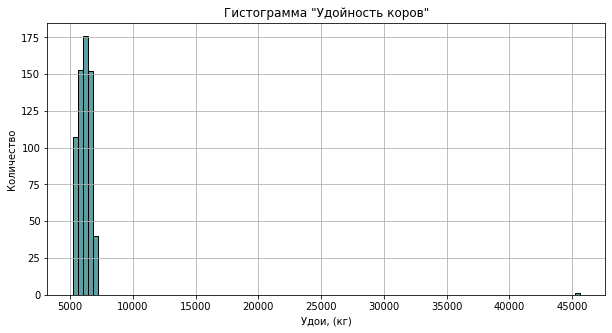

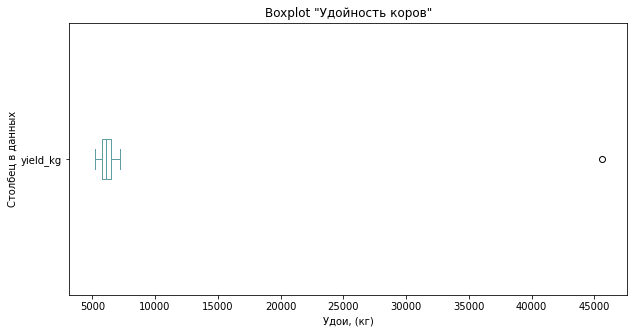

In [ ]:
(
    ferma_main['yield_kg']
    .plot(kind='hist', bins=100, grid=True,color='cadetblue', ec='black', figsize=(10, 5))
)
plt.title('Гистограмма "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['yield_kg']
    .plot(kind='box', vert=False,color ='cadetblue', figsize=(10, 5))
)
plt.title('Boxplot "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.ylabel('Столбец в данных')
plt.show()

**Вывод:** 

Значение является выбросом. Заменим медианным значением.

In [ ]:
ferma_main[ferma_main['yield_kg']==ferma_main['yield_kg'].max()]

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_flavor,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [ ]:
ferma_main.loc[16,'yield_kg'] = ferma_main['yield_kg'].median()
ferma_main.iloc [[16]]

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_flavor,age
16,17,6133.0,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [ ]:
ferma_main = ferma_main.drop (index=16)
ferma_main['yield_kg'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield_kg, dtype: float64

От выброса избавились, теперь посмотрим, как выглядит гистограмма и боксплот:

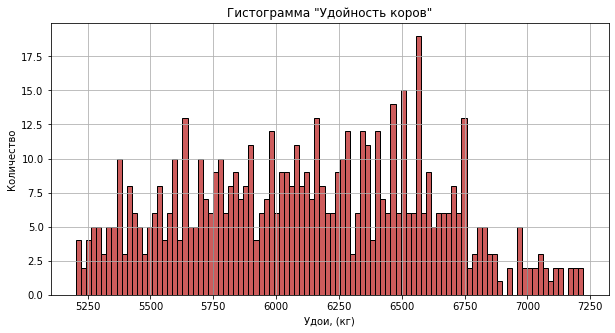

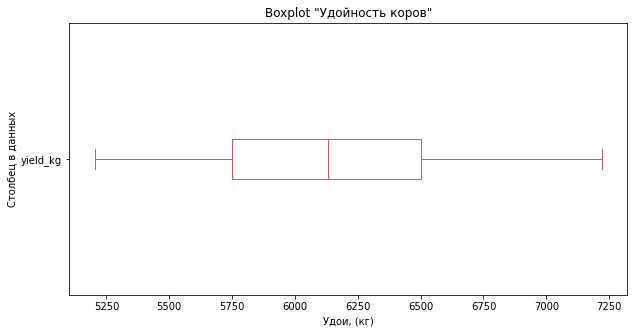

In [ ]:
(
    ferma_main['yield_kg']
    .plot(kind='hist', bins=100, grid=True,color='indianred', ec='black', figsize=(10, 5))
)
plt.title('Гистограмма "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['yield_kg']
    .plot(kind='box', vert=False, color='indianred', figsize=(10, 5))
)
plt.title('Boxplot "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.ylabel('Столбец в данных')
plt.show()

От выбросов избавились.

Изучим признак Энергетическая кормовая единица на корову.

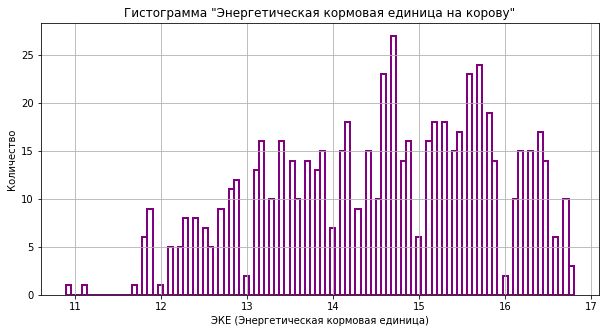

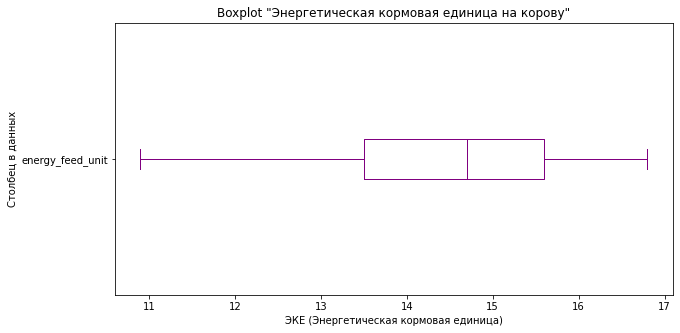

In [ ]:
ax = (
    ferma_main['energy_feed_unit']
    .plot(kind='hist', bins=100, grid=True,color='white', ec='purple', linewidth=2, figsize=(10, 5))
)

plt.title('Гистограмма "Энергетическая кормовая единица на корову"')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['energy_feed_unit']
    .plot(kind='box', vert=False, color='purple', figsize=(10, 5))
)
plt.title('Boxplot "Энергетическая кормовая единица на корову"')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Столбец в данных')
plt.show()

Выбросы отсутствуют. 

Изучим признак "Сырой протеин, грамм на корову"

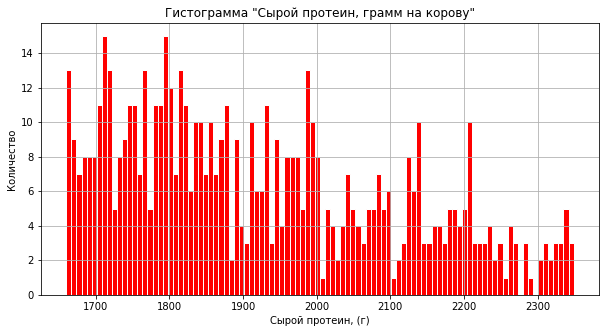

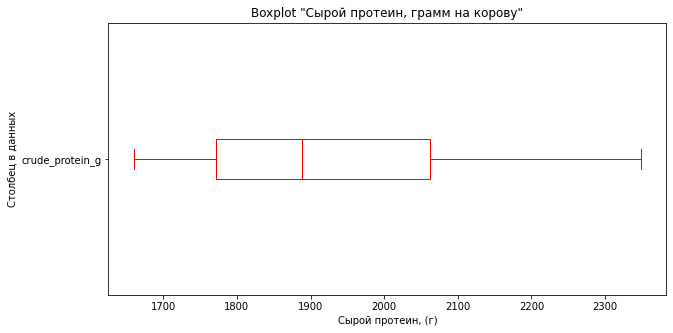

In [ ]:
(
    ferma_main['crude_protein_g']
    .plot(kind='hist', bins=100, grid=True, color='red', ec='white', figsize=(10, 5))
)
plt.title('Гистограмма "Сырой протеин, грамм на корову"')
plt.xlabel('Сырой протеин, (г)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['crude_protein_g']
    .plot(kind='box', vert=False,color='red', figsize=(10, 5))
)
plt.title('Boxplot "Сырой протеин, грамм на корову"')
plt.xlabel('Сырой протеин, (г)')
plt.ylabel('Столбец в данных')
plt.show()

В данном признаке также отсутствуют выбросы. Большая дисперсия. 


Изучим следующий признак: СПО.

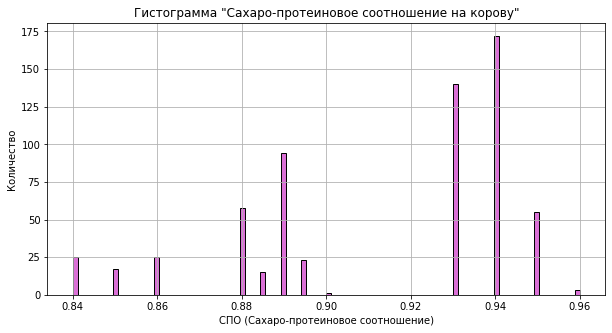

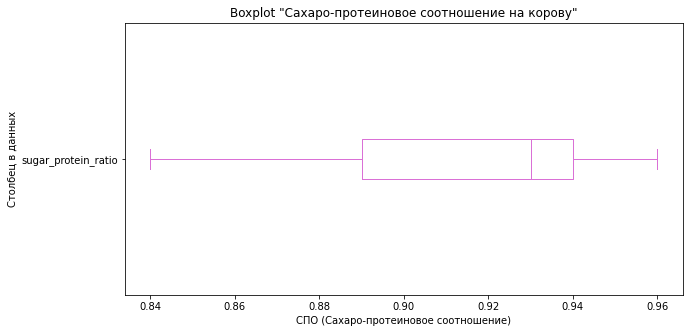

In [ ]:
(
    ferma_main['sugar_protein_ratio']
    .plot(kind='hist', bins=100, grid=True, color='orchid', ec='black', figsize=(10, 5))
)
plt.title('Гистограмма "Сахаро-протеиновое соотношение на корову"')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['sugar_protein_ratio']
    .plot(kind='box', vert=False, color='orchid', figsize=(10, 5))
)
plt.title('Boxplot "Сахаро-протеиновое соотношение на корову"')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Столбец в данных')
plt.show()

Выбросов у данного признака нет. 


Переходим к признаку "Содержание жиров в молоке коров".

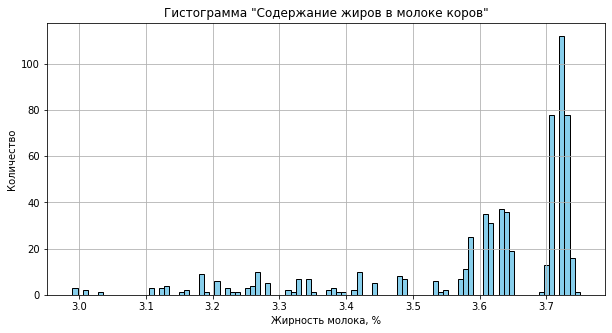

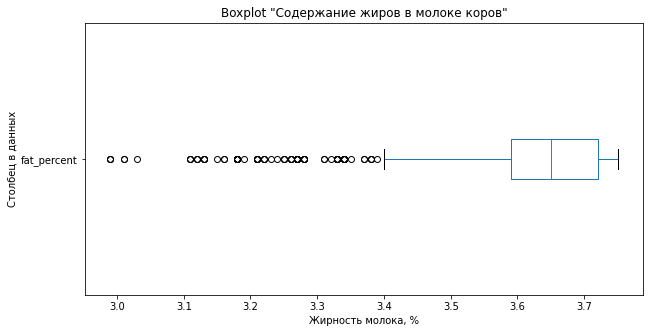

In [ ]:
(
    ferma_main['fat_percent']
    .plot(kind='hist', bins=100, grid=True, color='skyblue', ec='black', figsize=(10, 5))
)
plt.title('Гистограмма "Содержание жиров в молоке коров"')
plt.xlabel('Жирность молока, %')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['fat_percent']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Содержание жиров в молоке коров"')
plt.xlabel('Жирность молока, %')
plt.ylabel('Столбец в данных')
plt.show()

Присутствует большое количество выбросов. Однако их можно объяснить молодым возрастом коров, или если это стельные коровы. 


Проверим признак "Содержание белка в молоке".

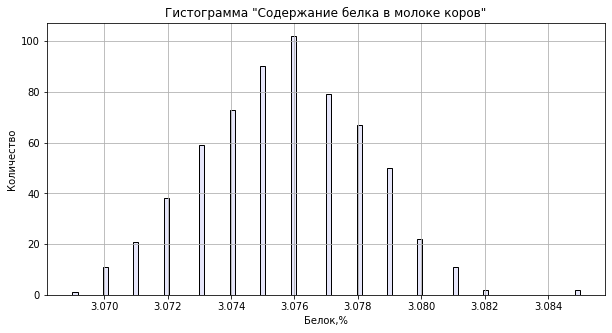

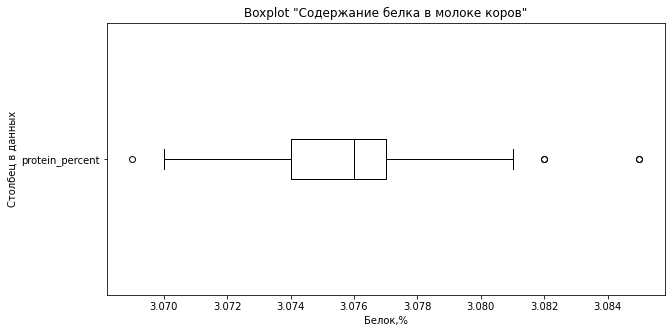

In [ ]:
(
    ferma_main['protein_percent']
    .plot(kind='hist', bins=100, grid=True,color='lavender', ec='black', figsize=(10, 5))
)
plt.title('Гистограмма "Содержание белка в молоке коров"')
plt.xlabel('Белок,%')
plt.ylabel('Количество')
plt.show()
(
    ferma_main['protein_percent']
    .plot(kind='box', vert=False, color='black', figsize=(10, 5))
)
plt.title('Boxplot "Содержание белка в молоке коров"')
plt.xlabel('Белок,%')
plt.ylabel('Столбец в данных')
plt.show()

Присутствуют выбросы. Их можно заменить медианным значением, либо оставить. Данные признаки являются количественными.


**_________________________________________________________________________________________________________________________________________________________________________________________________**

Также необходимо проанализировать категориальные признаки.

In [ ]:
ferma_main.describe(include='object')

,breed,pasture_type,sire_breed,milk_flavor,age
count,628,628,628,628,628
unique,2,2,2,2,2
top,Вис Бик Айдиал,Холмистое,Айдиал,вкусно,более_2_лет
freq,372,350,317,370,518


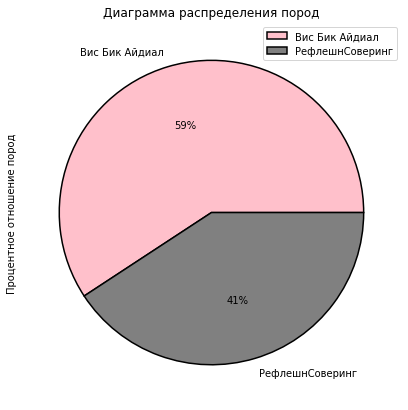

In [ ]:
(
ferma_main
    .pivot_table(index='breed',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', colors=['pink', 'grey'], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, figsize=(10,7), label='Процентное отношение пород')
)
plt.title('Диаграмма распределения пород')
plt.show()

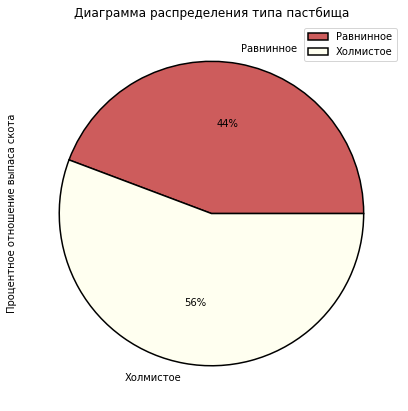

In [ ]:
(
ferma_main
    .pivot_table(index='pasture_type',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', colors=['indianred','ivory'],wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, figsize=(10,7), label='Процентное отношение выпаса скота')
)
plt.title('Диаграмма распределения типа пастбища')
plt.show()

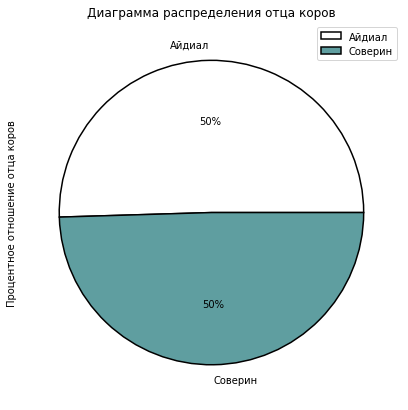

In [ ]:
(
ferma_main
    .pivot_table(index='sire_breed',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%',colors=['white', 'cadetblue'], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, figsize=(10,7), label='Процентное отношение отца коров')
)
plt.title('Диаграмма распределения отца коров')
plt.show()

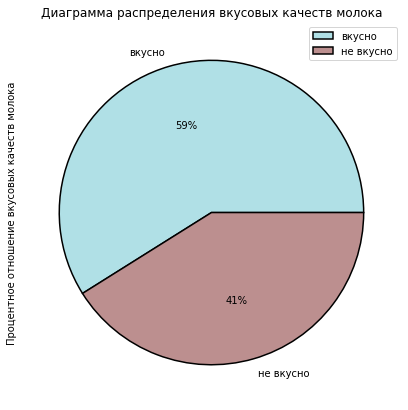

In [ ]:
(
ferma_main
    .pivot_table(index='milk_flavor',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', colors=['powderblue', 'rosybrown'], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  figsize=(10,7), label='Процентное отношение вкусовых качеств молока')
)
plt.title('Диаграмма распределения вкусовых качеств молока')
plt.show()

Наблюдается дисбаланс, так как категория "вкусно" преобладает над категорией "невкусно".
    получается, что обученная модель может ошибочно из-за такой статистики присвоить невкусному молоку категорию "вкусное", это может привести к смещению метрик. 
        Accuracy: В данном случае точность может быть высока даже при плохой классификации, модель не будет эффективно классифицировать невкусное молоко.

Recall и Precision: Модель может показывать хорошую точность для вкусного молока, так как его больше в выборке, а невкусного меньше в обучающих данных.очность для "вкусных" образцов, но плохие показатели для "невкусных", так как их меньше в обучающих данных.
 
Возможно пригодится использование метрики ROC AUC.Либо устраненеи дисбаланса 

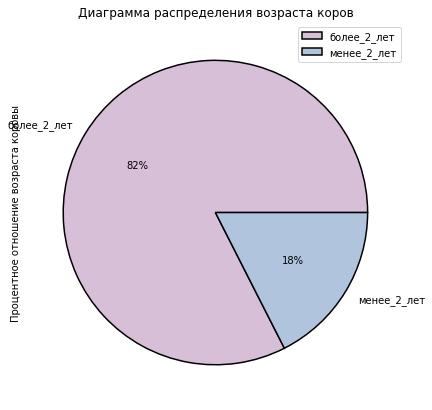

In [ ]:
(
ferma_main
    .pivot_table(index='age',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%',colors=['thistle', 'lightsteelblue'], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, figsize=(10,7), label='Процентное отношение возраста коровы')
)
plt.title('Диаграмма распределения возраста коров')
plt.show()

**Вывод:**

В результате проведенного исследовательского анализа данных были обработаны численные и категориальные признаки.
Изучили описательную статистику численных и категориальных признаков.

Для таких показателей, как Удойность коров, Содержание жиров в молоке, Содержание белка в молоке можно отметить наличие выбросов. Причем у показателя Содержание жиров в молоке их больше всего. Возможно, это характерно для молодых или стельных коров, потому мы получили такой результат. Данные выбросы принято решение оставить.

В Удойности коров присутствует один выброс, который мог появиться при ошибочном внесении данных, данный выброс мы заменили медианным значением.

Показатель Содержание жиров в молоке содержит 3 выброса, их можно оставить или также заменить медианным. Принято решение оставить.

- В целом по числовым признакам:
    + 'yield_kg' - удой - выбросов нет, т.к. провели замену медианным значением,;
    + 'energy_feed_unit' - ЭКЕ -  выбросов нет
    + 'crude_protein_g' - сырой протеин -  выбросов нет
    + 'sugar_protein_ratio' - СПО -  выбросов нет
    + 'fat_percent' - жирность - присутствует большое количество выбросов, возможно это молодые или стельные коровы
    + 'protein_percent' - протеин -  содержит три выброса.
    
    
- По категориальным признакам:
    + 'breed' - преобладает порода Вис Бик Айдиал (59%)
    + 'pasture_type' - преобладает Холмистый выпас (56%)
    + 'sire_breed' - порода папы коров имеет соотношение 50/50%
    + 'milk_flavor' - молоко чаще вкусное (59%)
    + 'age' - больше всего в хозяйстве коров в возрасте более 2 лет (82%)


Для улучшения данных можно:
1. Работа с выбросами
Для дальнейшего улучшения можно проверить, нет ли зависимости между удойностью и другими признаками, как возраст коров или тип пастбища. Это поможет лучше понять природу выброса.

Содержание жиров в молоке: можно предложить сегментировать коров по возрасту и проверить закономерности, и если действительно жирность молока связана с возрастом или состоянием коровы, выбросы можно исключить или учесть при моделировании.


2. Проверка на полноту данных

Можно запросить более подробную статистику у фермы.

### 4. Корреляционный анализ признаков

Таблицы `ferma_main` и `ferma_dad` можно объединить по столбцу  `id`.

In [ ]:
ferma_main = pd.merge(ferma_main, ferma_dad, on='id', how='left')
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   yield_kg             628 non-null    float64
 2   energy_feed_unit     628 non-null    float64
 3   crude_protein_g      628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   sire_breed           628 non-null    object 
 8   fat_percent          628 non-null    float64
 9   protein_percent      628 non-null    float64
 10  milk_flavor          628 non-null    object 
 11  age                  628 non-null    object 
 12  dad_name             628 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 68.7+ KB


In [ ]:
ferma_main.shape

(628, 13)

Изучим корреляцию между количественными признаками путем построения heatmap'a (Матрицы корреляции).

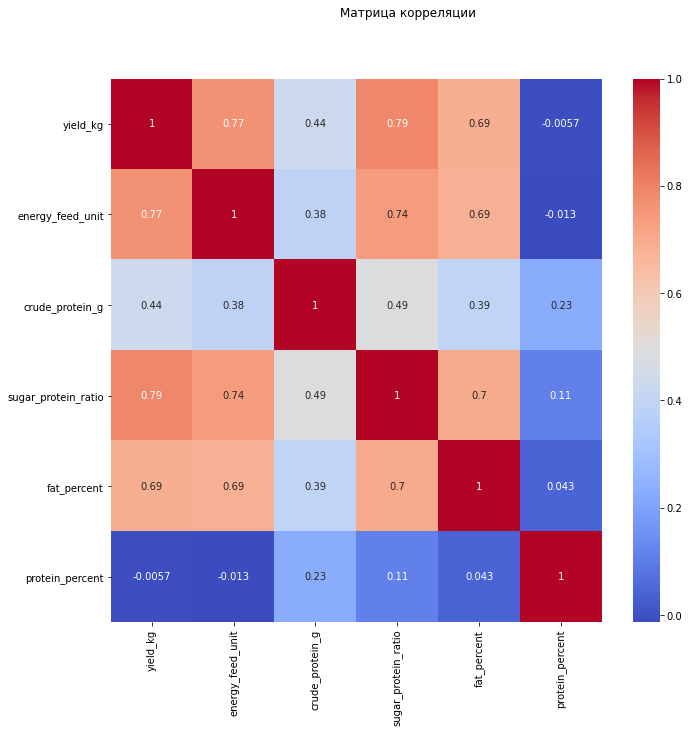

In [ ]:
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции')
sns.heatmap(ferma_main.drop('id', axis=1).select_dtypes(include=['int', 'float']).corr(method="spearman"), annot=True, cmap='coolwarm');

Построим диаграммы рассеяния (скаттерплот)

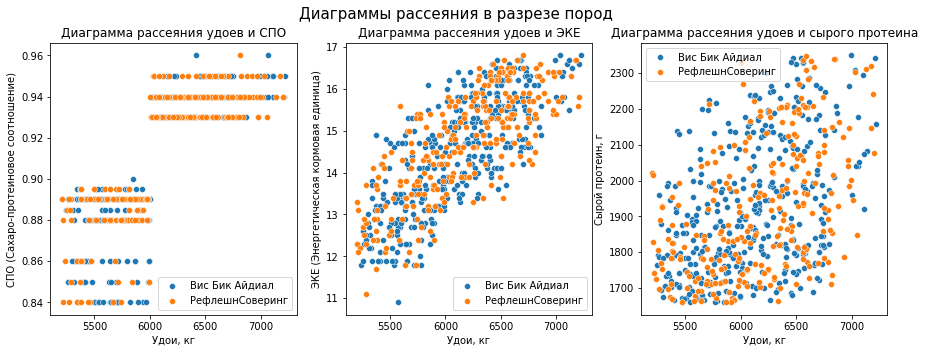

In [ ]:
df1 = ferma_main[ferma_main['breed'] == 'Вис Бик Айдиал']
df2 = ferma_main[ferma_main['breed'] == 'РефлешнСоверинг']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе пород', fontsize=15)

# график 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'Вис Бик Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'РефлешнСоверинг');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

# график 2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'Вис Бик Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'РефлешнСоверинг');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

# график 3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'Вис Бик Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'РефлешнСоверинг');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

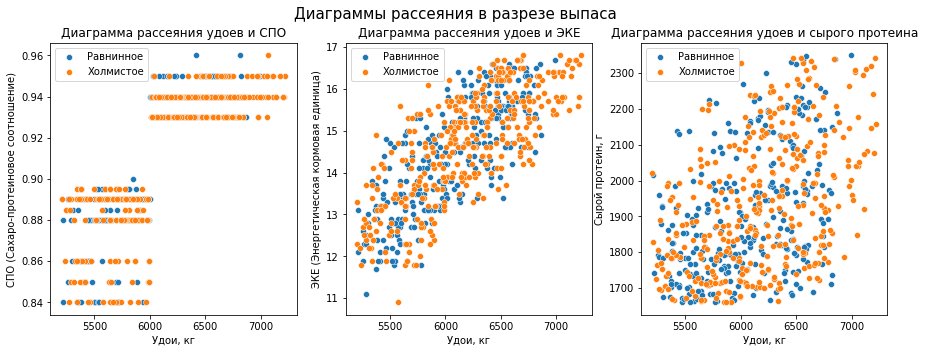

In [ ]:
df1 = ferma_main[ferma_main['pasture_type'] == 'Равнинное']
df2 = ferma_main[ferma_main['pasture_type'] == 'Холмистое']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе выпаса', fontsize=15)

# график 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'Равнинное')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'Холмистое');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

# график 2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'Равнинное')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'Холмистое');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

# график 3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'Равнинное')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'Холмистое');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

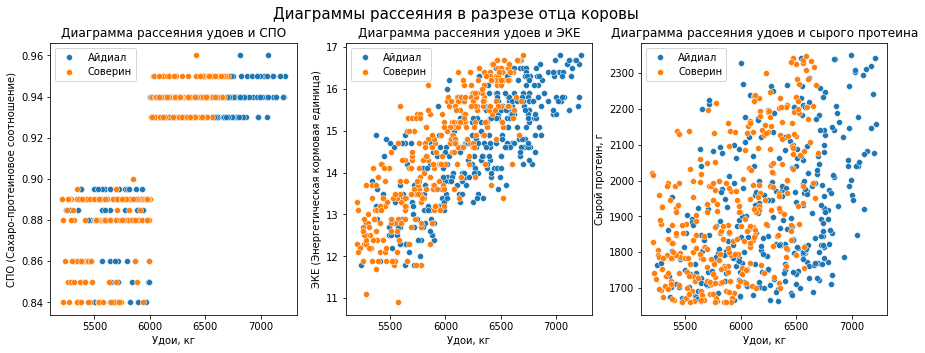

In [ ]:
df1 = ferma_main[ferma_main['sire_breed'] == 'Айдиал']
df2 = ferma_main[ferma_main['sire_breed'] == 'Соверин']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе отца коровы', fontsize=15)

# график 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'Соверин');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

# график 2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'Соверин');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

# график 3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'Соверин');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

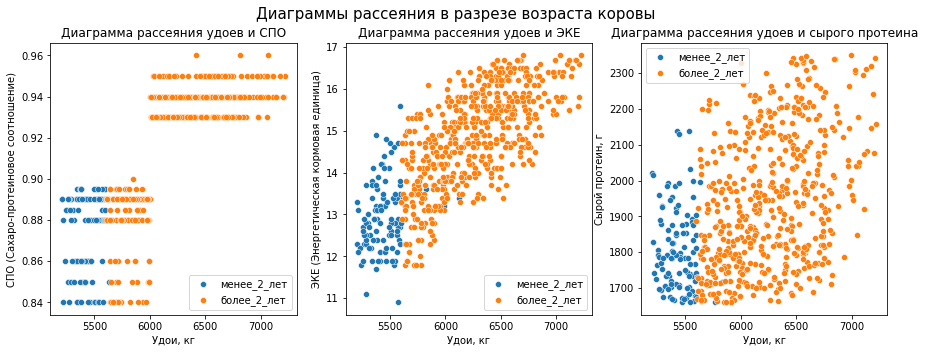

In [ ]:
df1 = ferma_main[ferma_main['age'] == 'менее_2_лет']
df2 = ferma_main[ferma_main['age'] == 'более_2_лет']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе возраста коровы', fontsize=15)

# график 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'менее_2_лет')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'более_2_лет');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

# график 2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'менее_2_лет')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'более_2_лет');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

# график 3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'менее_2_лет')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'более_2_лет');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

### 4.3 Вывод по корреляционному анализу

**Вывод:**

По матрице корреляции можно сделать следующие выводы:
+ сильная зависимость между удоем и СПО - 0,79;
+ сильная зависимость между удоем и ЭКЕ - 0,77.
+ средняя зависимость между удоем и жирностью молока (0,69), однако эта связь обусловлена самим удоем, а также стоит отметить, что жирность может влиять на вкус молока, но целевым признаком не является.

Связи с корреляцией выше 0,9 между входными параметрами не обнаружено, что позволяет исключить проблему мультиколлинеарности при обучении модели.

В процессе проведения корреляционного анализа данных можно заметить, что:
1. Молодые коровы до 2 лет содержатся на кормах в которых малое сахоро - протеиновое отношение мало (до 0,90 единиц). Прослеживается четкая граница их удойности примерно до 5300 килограмм молока, с возрастом удой коров увеличивается, но для дальнейшего роста удоя необходимо увеличивать СПО. Коровы переведенные на такой корм дают увеличивают удои свыше 6000 кг.
2. У коров отцом которых был "Айдиал" при переходе на корм с показателем СПО > 0.92 единицы прослеживаются большие удои по сравнению с другой группой, при этом в сравнении пород такой явной зависимости не прослеживается.
3. По ЭКЕ и удою у среднее между линейной и квадратичной зависимостью так как прослеживается небольшой изгиб на диаграмме рассеяния входных данных. Чтобы модель могла корректно учитывать признак, предлагается взять квадрат признака.


В ходе проведения корреляционного анализа данных были выявлены следующие важные наблюдения:

1. Молодые коровы, возрастом до 2 лет, находятся на рационе с низким соотношением сахара и протеина, при этом удой не такой большой (в районе 5300 кг).
С возрастом наблюдается рост удоя, однако для дальнейшего повышения этого показателя необходимо увеличить соотношение сахара и протеина. Коровы, переведенные на корм с более высоким СПО, показывают увеличение удоев свыше 6000 кг.

2. При соблюдении условий предыдущего пункта, можно отметить, что на удой также влияет порода папы коровы. У коров породы "Айдиал" наблюдаются значительно более высокие удои по сравнению с другими группами. 

3. Взаимосвязь между энергетической кормовой единицей (ЭКЕ) и удоем характеризуется смешанным типом зависимости.

### 5. Обучение модели линейной регрессии

#### 5.1 Первая модель линейной регрессии

In [ ]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   yield_kg             628 non-null    float64
 2   energy_feed_unit     628 non-null    float64
 3   crude_protein_g      628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   sire_breed           628 non-null    object 
 8   fat_percent          628 non-null    float64
 9   protein_percent      628 non-null    float64
 10  milk_flavor          628 non-null    object 
 11  age                  628 non-null    object 
 12  dad_name             628 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 68.7+ KB


In [ ]:
RANDOM_STATE = 42

cat_col_names = ['breed',
                 'pasture_type',
                 'sire_breed',
                 'age'
                ]
num_col_names = ['energy_feed_unit',
                 'crude_protein_g',
                 'sugar_protein_ratio'
                ]
# Отделение целевого признака
X = ferma_main.drop('yield_kg', axis=1)
y = ferma_main['yield_kg']
# Удаление признаков, не влиябщих на удой
X = X.drop(['id', 'fat_percent', 'protein_percent', 'milk_flavor'], axis=1)
X.head()

,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,age,dad_name
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин


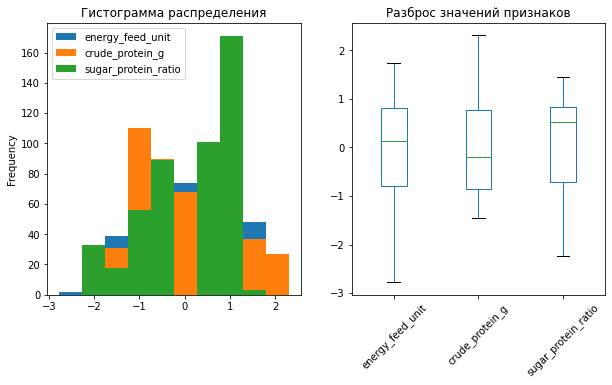

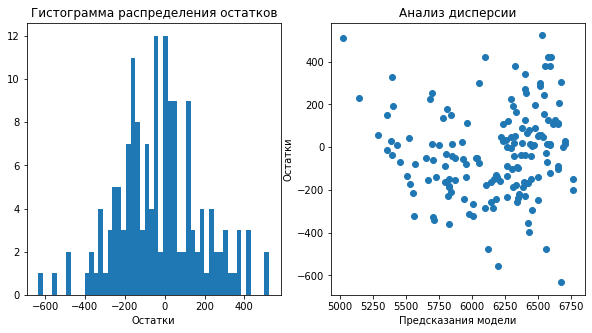


R^2 LinearRegression = 0.78 ((+∞ до 1), lim = 1) 
RMSE LinearRegression  = 209.49 ((0 до +∞), lim = 0)
MSE LinearRegression  = 43887.02 ((0 до +∞), lim = 0)
MAE LinearRegression = 164.24 ((0 до +∞), lim = 0)


In [ ]:
# Разделение выборки на обучающую и целевую
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

# обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

residuals = y_test - predictions


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print()

#  R2 для линейной регрессии
r2 = r2_score(y_test, predictions)
print(f'R^2 LinearRegression = {r2:.2f} ((+∞ до 1), lim = 1) ')

# RMSE для линейной регрессии
rmse = (mean_squared_error(y_test, predictions))**0.5
print(f'RMSE LinearRegression  = {rmse:.2f} ((0 до +∞), lim = 0)')

# MSE для линейной регрессии
mse = mean_squared_error(y_test, predictions)
print(f'MSE LinearRegression  = {mse:.2f} ((0 до +∞), lim = 0)')

# средняя абсолютная ошибка на тестовых данных
mae = mean_absolute_error(y_test, predictions)
print(f'MAE LinearRegression = {mae:.2f} ((0 до +∞), lim = 0)')

**Анализ результатов первой модели**

Чем ближе значение R² к единице, тем точнее работает модель. Для первой модели это значение равно 0,78. Можно предположить, что модель имеет умеренную предсказательную способность.

Остатки имеюют нормальное распределение, хоть и имеется небольшое смещение. Означает, что модель адекватно оценивает в своих прогнозах относительно реального объема Удоя.
 
Проведем дополнительные преобразования. 

#### 5.2 Вторая модель линейной регрессии

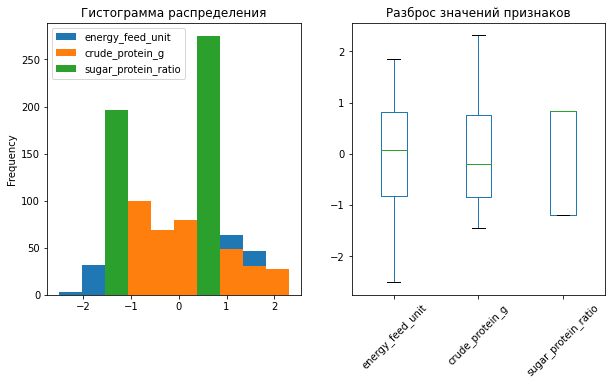

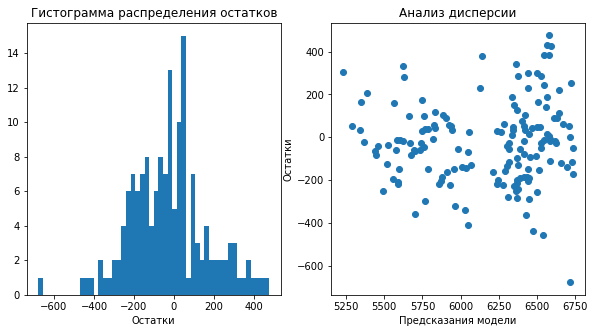


R^2 LinearRegression = 0.82 ((+∞ до 1), lim = 1) 
RMSE LinearRegression  = 192.43 ((0 до +∞), lim = 0)
MSE LinearRegression  = 37030.91 ((0 до +∞), lim = 0)
MAE LinearRegression = 149.04 ((0 до +∞), lim = 0)


In [ ]:
X['sugar_protein_ratio'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x>0.92 else 0)
X['energy_feed_unit'] = X['energy_feed_unit'].apply(lambda x: x**2)
# Разделение выборки на обучающую и целевую
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

# подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# построение графиков по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

# обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

## проведение анализа остатков
# рассчет остатков
residuals = y_test - predictions

# построение графиков по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print()

# рассчитаем значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)
print(f'R^2 LinearRegression = {r2:.2f} ((+∞ до 1), lim = 1) ')

# рассчитаем значения RMSE для линейной регрессии
rmse = (mean_squared_error(y_test, predictions))**0.5
print(f'RMSE LinearRegression  = {rmse:.2f} ((0 до +∞), lim = 0)')

# рассчитаем значения MSE для линейной регрессии
mse = mean_squared_error(y_test, predictions)
print(f'MSE LinearRegression  = {mse:.2f} ((0 до +∞), lim = 0)')

# посчитаем среднюю абсолютную ошибку на тестовых данных
mae = mean_absolute_error(y_test, predictions)
print(f'MAE LinearRegression = {mae:.2f} ((0 до +∞), lim = 0)')

**Анализ результатов второй модели**

После проведенных улучшений модели можно отметить, что это отразилось на метриках. Значение R^2 стало 0,82, то есть модель стала еще более точной. 

Гистограмма остатков также имеет нормальное распределение.

Попробуем настроить третью модель линейной регрессии, чтобы посмотреть, как точно она будет делать прогноз.

#### 5.3 Третья модель линейной регрессии

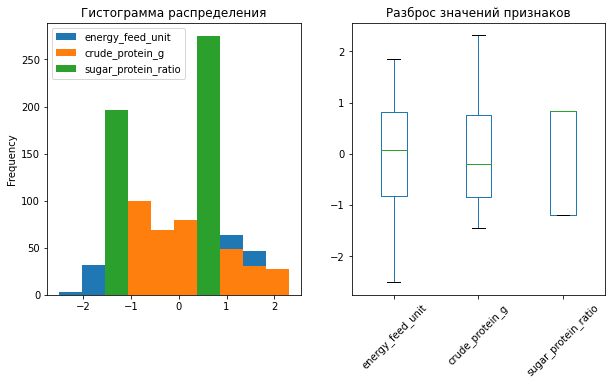

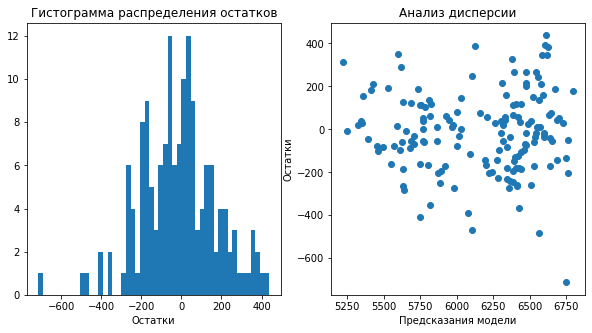


R^2 LinearRegression = 0.82 ((+∞ до 1), lim = 1) 
RMSE LinearRegression  = 188.88 ((0 до +∞), lim = 0)
MSE LinearRegression  = 35673.89 ((0 до +∞), lim = 0)
MAE LinearRegression = 146.16 ((0 до +∞), lim = 0)


In [ ]:
cat_col_names = ['breed',
                 'pasture_type',
                 'sire_breed',
                 'age',
                 'dad_name'
                ]
num_col_names = ['energy_feed_unit',
                 'crude_protein_g',
                 'sugar_protein_ratio',
                ]

# Разделение выборки на обучающую и целевую
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

# подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# построение графиков по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

# обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

## проведение анализа остатков
# рассчет остатков
residuals = y_test - predictions

# построение графиков по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print()

# рассчитаем значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)
print(f'R^2 LinearRegression = {r2:.2f} ((+∞ до 1), lim = 1) ')

# рассчитаем значения RMSE для линейной регрессии
rmse = (mean_squared_error(y_test, predictions))**0.5
print(f'RMSE LinearRegression  = {rmse:.2f} ((0 до +∞), lim = 0)')

# рассчитаем значения MSE для линейной регрессии
mse = mean_squared_error(y_test, predictions)
print(f'MSE LinearRegression  = {mse:.2f} ((0 до +∞), lim = 0)')

# посчитаем среднюю абсолютную ошибку на тестовых данных
mae = mean_absolute_error(y_test, predictions)
print(f'MAE LinearRegression = {mae:.2f} ((0 до +∞), lim = 0)')

**Анализ результатов третьей модели**

1. R2 остался 0,82 (скорее всего, у модели 2 сработало округление, и всё-таки немного, но у третьей модели данный показатель выше, что по-прежнему говорит о том, что данная модель является довольно-таки точной.
По распределению остатков: - смещения практически нет, то есть модель примерно адекватно оценивает удои - распределение остатков стало более равномерно


**1 модель:** R^2 0,78 |  RMSE 209,49 | MSE 43887,02 | MAE 164,24

**2 модель:** R^2 0,82 |  RMSE 192,43 | MSE 37030,91 | MAE 149,04

**3 модель:** R^2 0,82 |  RMSE 188,88 | MSE 35673,89 | MAE 146,16

Третья модель имеет R^2 0,82 - является более точной по сравнению с остальными.

Также если рассматривать параметр RMSE, можно отметить, что 3 модель будет ошибаться примерно на 188,88, что является лучшим результом, в сравнении с другими моделями (например, модель 1 ошибается на 209,49 кг).

А MSE третьей модели также показывает, что наименьшее среднее значение ошибок.

И судя по значению MAE, 3 модель будет лучше работать с выбросами.

Поэтому для прогноза выбираем **Модель №3**



In [ ]:
print('\n95% доверительный интервал =', stats.norm.interval
      (0.95,
       loc=np.mean(predictions), 
       scale=stats.sem(predictions)
      )
     )



95% доверительный интервал = (6092.340075854288, 6221.3750700583805)


Получается, что 95% значений будут лежать в данном диапазоне, будем ориентироваться, чтобы удой стремился к максимальному значению - 6522.

#### 5.4 Прогноз удоя коров с помощью выбарнной модели МО

Дополним датасет cow_buy данными из таблицы ferma_main.

In [ ]:
X_g = cow_buy
# Добавление столбцов со средними значениями из ferma_main + 5%
X_g['energy_feed_unit'] = ferma_main['energy_feed_unit'].mean()*1.05
X_g['crude_protein_g'] = (ferma_main['crude_protein_g'].mean()*1.05).astype(int)
X_g['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean()*1.05
# Приведение колонок в соответствие
columns = ferma_main.columns
columns = columns.drop(labels=['id','yield_kg',  'milk_flavor'])
X_g = X_g[columns]
# Удаление излишних данных не влияющих на удой
X_g = X_g.drop(['fat_percent', 'protein_percent'], axis=1)
# Преобразование столбцов к требованиям 2 модели
X_g['sugar_protein_ratio'] = X_g['sugar_protein_ratio'].apply(lambda x: 1 if x>0.92 else 0)
X_g['energy_feed_unit'] = X_g['energy_feed_unit'].apply(lambda x: x**2)
X_g

,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,age,dad_name
0,233.361138,2019,1,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Геркулес
1,233.361138,2019,1,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Буйный
2,233.361138,2019,1,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,Барин
3,233.361138,2019,1,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
4,233.361138,2019,1,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,Буйный
5,233.361138,2019,1,РефлешнСоверинг,Равнинное,Соверин,менее_2_лет,Геркулес
6,233.361138,2019,1,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Геркулес
7,233.361138,2019,1,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,Буйный
8,233.361138,2019,1,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,Барин
9,233.361138,2019,1,РефлешнСоверинг,Холмистое,Айдиал,менее_2_лет,Буйный


In [ ]:
X_g_ohe = encoder.transform(X_g[cat_col_names])
X_g_scaled = scaler.transform(X_g[num_col_names])
X_g_ohe = pd.DataFrame(X_g_ohe, columns=encoder_col_names)
X_g_scaled = pd.DataFrame(X_g_scaled, columns=num_col_names)
X_g = pd.concat([X_g_ohe, X_g_scaled], axis=1)


predictions = model_lr.predict(X_g)

#создадим отдельную таблицу покупок, которая копирует cow+buy
buy = cow_buy.copy()
buy['predictions_yield_kg'] = predictions.astype(int)

In [ ]:
print('Модель предлагает купить', len(buy[buy['predictions_yield_kg']>6000]), 'коров из', len(cow_buy), 'предлагаемых "ЭкоФермой"')
print('Список коров "Экофермы" и ожидаемые удои в таблице ниже:')

Модель предлагает купить 20 коров из 20 предлагаемых "ЭкоФермой"
Список коров "Экофермы" и ожидаемые удои в таблице ниже:


Применена лучшая по качеству и по точности модель к данным из датасета cow_buy.csv и получен прогноз удоя коров. Все коровы Экофермы будут давать молока больше 6000 кг/год.


### 6. Обучение модели логистической регрессии

In [ ]:
RANDOM_STATE = 42

cat_col_names = ['breed',
                 'pasture_type',
                 'sire_breed',
                 'age',
                 'dad_name']
num_col_names = ['energy_feed_unit',
                 'crude_protein_g',
                 'sugar_protein_ratio',
                 'fat_percent',
                 'protein_percent'
                ]

# Отделение целевого признака
X = ferma_main.drop('milk_flavor', axis=1)
y = ferma_main['milk_flavor']
X_g = buy.copy()  # Делаем копию, чтобы избежать работы с "видом"

# Перевод в числовой признак Вкусно = 1, Не вкусно = 0
y = y.apply(lambda x: 0 if x == 'не вкусно' else 1)

# Удаление излишних данных, не влияющих на удой
X = X.drop(['id', 'yield_kg'], axis=1)

# Перестановка столбцов
columns = X.columns
X_g = X_g[columns]

# Преобразование столбцов
X['sugar_protein_ratio'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
X['energy_feed_unit'] = X['energy_feed_unit'].apply(lambda x: x**2)

# Теперь применяем изменения к X_g, используя .loc для корректного индексации
X_g.loc[:, 'sugar_protein_ratio'] = X_g['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
X_g.loc[:, 'energy_feed_unit'] = X_g['energy_feed_unit'].apply(lambda x: x**2)

# Приведение типов
X_g[['crude_protein_g']] = ferma_main[['crude_protein_g']].astype('int')


#### 6.1 Подготовка данных, аналогичная той, которую делали для обучения модели и получения прогноза

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

# подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели
clf = LogisticRegression(random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)
# Получение предсказания
y_pred = clf.predict(X_test)

buy['yield_kg'] = ferma_main['yield_kg']

print(predictions[1], y_test.reset_index(drop=True)[1])

acc = accuracy_score(y_test, y_pred)
print('Точность модели:', acc)

recall = recall_score(y_test, y_pred)
print('Recall:',recall)

precision = precision_score(y_test, y_pred) 
print('Precision:', precision)

6378.44207456374 1
Точность модели: 0.6305732484076433
Recall: 0.8636363636363636
Precision: 0.6229508196721312


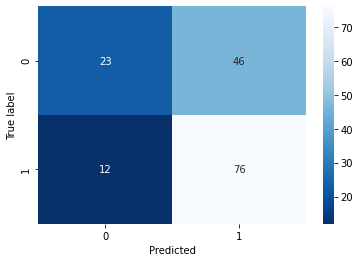

In [ ]:
# Построим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

### 6.2 Анализ модели логистической регресии

Если молоко вкусное, то модель ставит значение 1.

Accuracy. Показывает как точно модель делает прогнозы (как часто ошибается). К сожалению, согласно нашему результату, в 37% случаев модель допустит ошибку.

Однако, я бы не сказала, что оценивать вкус как целевой признак точно можно с помощью модели, так как эта характеристика является субъективной. Может быть, это фермер решил, что молоко вкусное и передал такие данные, а на самом деле оно невкусное. 
А так, вкус молока зависит, конечно же, от жирности, от содержания белка. Пытались это учесть при работе. А также возраст коровы, тип пастбища, порода также являются немаловажными характеристиками.


Recall. Также оценивает полноту модели. То, как правильно она выставляет значение 1. То есть верно угадывает, вкусное молоко или нет. Согласно нашим результатам, в 86% случаев, модель правильно спрогнозировала, что молоко вкусное.

Precision. Метрика, которая показывает, как часто модель даёт невкусному молоку результат вкусное. В 62% модель может спрогнозировать ложно-положительный результат.


##### Попробуем настроить порог классификации с помощью функции.

In [ ]:
# Функция расчета предсказаний с учетом изменяемого порога

def prob_pred(X, threshold):
    probs = clf.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int), probs[:, 1]


Создадим датафрейм и зададим ему 'thresholds' от 0.01 до 0.99 
и значениями 'acc', 'recall', 'precision', 'tn', 'fp', 'fn', 'tp'

In [ ]:
thresholds = [i/100 for i in range(1,100)]

acc = []
recall = []
precision = []
tn = []
fp = []
fn = []
tp = []
# создадим цикл

for threshold in thresholds:
    new_predictions = prob_pred(X=X_test, threshold=threshold)[0]
    # Расчет показателей 'accuracy'
    acc.append(accuracy_score(y_test, new_predictions))
    # Расчет показателей 'recall'
    recall.append(recall_score(y_test, new_predictions))
    # Расчет показателей 'precision'
    precision.append(precision_score(y_test, new_predictions, zero_division=0))
    # Расчет количества ошибок по типам
    tn.append(np.sum((new_predictions == 0) & (y_test == 0)))
    fp.append(np.sum((new_predictions == 1) & (y_test == 0)))
    fn.append(np.sum((new_predictions == 0) & (y_test == 1)))
    tp.append(np.sum((new_predictions == 1) & (y_test == 1)))
    
acc, recall, precision
df = pd.DataFrame([thresholds, acc, recall, precision, tn, fp, fn, tp]).T
df.columns = ['thresholds', 'acc', 'recall', 'precision', 'tn', 'fp', 'fn', 'tp']
df[47:52]

,thresholds,acc,recall,precision,tn,fp,fn,tp
47,0.48,0.624204,0.875000,0.616000,21.0,48.0,11.0,77.0
48,0.49,0.636943,0.875000,0.626016,23.0,46.0,11.0,77.0
49,0.50,0.630573,0.863636,0.622951,23.0,46.0,12.0,76.0
50,0.51,0.630573,0.852273,0.625000,24.0,45.0,13.0,75.0
51,0.52,0.636943,0.852273,0.630252,25.0,44.0,13.0,75.0


В нашем случае FP лучше устранить.

In [ ]:
thresholds_precision = df[df['fp']!=0].tail(1)['thresholds'].values[0]
#thresholds_precision = df[df['fp']==0].head(1)['thresholds'].values[0]

print('Отсутствие ложно-положительного результата  при threshold =', thresholds_precision) 



Отсутствие ложно-положительного результата  при threshold = 0.8


1) Для модели главнее всего минимизировать ошибки FP - которые означают, что модель может ошибочно невкусному молоку выставить параметр вкусное.

2) Порог принадлежности к классам высок, что тоже не совсем благоприятно для прогноза. 

#### 6.3 Прогноз вкус молока для дальнейшей покупки фермером.

Масштабирование и кодирование данных:

In [ ]:
X_g_ohe = encoder.transform(X_g[cat_col_names])
X_g_scaled = scaler.transform(X_g[num_col_names])
X_g_ohe = pd.DataFrame(X_g_ohe, columns=encoder_col_names)
X_g_scaled = pd.DataFrame(X_g_scaled, columns=num_col_names)
X_g = pd.concat([X_g_ohe, X_g_scaled], axis=1)

In [ ]:
# предсказание на данных с выбранным порогом
predictions_precision = prob_pred(X=X_g, threshold=thresholds_precision)
predictions_precision

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0.64940781, 0.68061783, 0.52684743, 0.35787469, 0.47249384,
        0.08435407, 0.65993771, 0.60973938, 0.54198381, 0.69483906,
        0.12343063, 0.58552164, 0.11790391, 0.59747943, 0.50667261,
        0.39408938, 0.6599703 , 0.11288459, 0.35578468, 0.53159881]))

In [ ]:
buy['milk_flavor_precision'] = predictions_precision[0]
buy['probability'] = predictions_precision[1]
print('Количество, рекомендуемое к покупке:', len(buy[buy['milk_flavor_precision']==1]))


Количество, рекомендуемое к покупке: 0


После того, как мы минимизировали ложно-положительный результат при прогнозе вкуса молока, модель сделала прогноз, согласно которому она не рекомендует к покупке ничего из предложенного ЭкоФермой.



### 7. Итоговые выводы

#### 7.1 Добавим прогнозы вкуса молока и удоя коров в датафрейм 

Добавим прогнозы вкуса молока и удоя коров в датафрейм с коровами `cow_buy`, где: `0` - невкусное молоко, `1` - вкусное молоко 

In [ ]:

cow_buy['pred_yield_kg'] = buy['yield_kg']
cow_buy['milk_flavor_precision'] = buy['milk_flavor_precision']
cow_buy['probability'] = buy['probability'].round(2)
cow_buy

,breed,pasture_type,sire_breed,dad_name,fat_percent,protein_percent,age,energy_feed_unit,crude_protein_g,sugar_protein_ratio,pred_yield_kg,milk_flavor_precision,probability
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019,0.958744,5863.0,0,0.65
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019,0.958744,5529.0,0,0.68
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019,0.958744,5810.0,0,0.53
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019,0.958744,5895.0,0,0.36
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019,0.958744,5302.0,0,0.47
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019,0.958744,5254.0,0,0.08
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019,0.958744,5910.0,0,0.66
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019,0.958744,6179.0,0,0.61
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019,0.958744,6783.0,0,0.54
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019,0.958744,5339.0,0,0.69


#### 7.2 Отбор коров, для которых спрогнозирован удой более 6000 кг. в год и вкусное молоко.

In [ ]:
print('Количество коров, которые соответствуют искомым параметрам:', len(cow_buy.query('pred_yield_kg > 6000 and milk_flavor_precision == 1')))
cow_buy.query('pred_yield_kg > 6000 and milk_flavor_precision == 1'); 

Количество коров, которые соответствуют искомым параметрам: 0


### ВЫВОД ПО ПРОЕКТУ

В результате проделанной работы, было обработано 3 датасета: ferma_main (информация о стаде, которая сейчас у фермера), ferma_dad (информация о быках), cow_buy (информация от Экофермы о коровах, которых фермер в перспективе хотел бы приобрести). 

Данные датасеты имеют **634, 629** и **20** строк соответственно.  

Во всех датасетах пропуски отсутствуют, данные полные. Однако наименования столбцов не соответствовали правилам хорошего стиля. 

В последнем датасете столбцы были названы соответственно датасету ferm_main, чтобы в дальнейшем можно было бы разрабатывать модель МО.

В датасете присутствуют неправильные типы данных, поэтому на этапе предобработки будем менять типы данных на верные.

В датасете ferma_main это:

+ energy_feed_unit (должно быть float64, указан object)
+ sugar_protein_ratio (должно быть float64, указан object)
+ fat_percent (должно быть float64, указан object)
+ protein_percent (должно быть float64, указан object)


В датасете cow_buy:

+ fat_percent (должно быть float64, указан object)
+ protein_percent (должно быть float64, указан object)

А также в процессе предобработки данных были выявлены и удалены явные дубликаты в датасете **ferma_main**, были изменены типы данных в соответствии с информацией, указанной выше.

В результате проведенного исследовательского анализа данных были обработаны численные и категориальные признаки. Изучили описательную статистику численных и категориальных признаков, чтобы изучить их распределение, наличие выбросов. Для каждого из признаков были построены графики (гистограммы, ящик с усами, скаттерплот, круговые диаграммы)

Для таких показателей, как Удойность коров, Содержание жиров в молоке, Содержание белка в молоке было отмечено наличие выбросов. 

Причем у показателя Содержание жиров в молоке их больше всего. Возможно, это характерно для молодых или стельных коров, потому мы получили такой результат. Данные выбросы принято решение оставить.

В Удойности коров присутствует один выброс, который мог появиться при ошибочном внесении данных, данный выброс был заменён медианным значением, так как он менее чувствителен к выбросам.

Показатель Содержание жиров в молоке содержит 3 выброса, их можно было оставить или также заменить медианным. Принято решение оставить.

В целом **вывод** по *числовым признакам*:

+ 'yield_kg' - удой - выбросов нет, т.к. провели замену медианным значением;
+ 'energy_feed_unit' - ЭКЕ -  выбросов нет
+ 'crude_protein_g' - сырой протеин -  выбросов нет
+ 'sugar_protein_ratio' - СПО -  выбросов нет
+ 'fat_percent' - жирность -  присутствует большое количество выбросов, возможно это молодые или стельные коровы
+ 'protein_percent' - протеин -  содержит три выброса.

По *категориальным признакам*:

+ 'breed' - преобладает порода Вис Бик Айдиал (59%)
+ 'pasture_type' - преобладает Холмистый выпас (56%)
+ 'sire_breed' - порода папы коров имеет соотношение 50/50%
+ 'milk_flavor' - молоко чаще вкусное (59%)
+ 'age' - больше всего в хозяйстве коров в возрасте более 2 лет (82%)


Если говорить о мерах, которые можно предпринять для улучшения данных:

- Работа с выбросами Для дальнейшего улучшения можно проверить, нет ли зависимости между удойностью и другими признаками, как возраст коров или тип пастбища. Это поможет лучше понять природу выброса.
- Содержание жиров в молоке: можно предложить сегментировать коров по возрасту и проверить закономерности, и если действительно жирность молока связана с возрастом или состоянием коровы, выбросы можно исключить или учесть при моделировании.
- Проверка на полноту данных (можно запросить более подробную статистику у фермы).

Также была построена матрица корреляции, чтобы наглядно проследить связь между признаками и удоем. Можно сделать следующие выводы:

+ сильная зависимость между удоем и СПО - 0,79;
+ сильная зависимость между удоем и ЭКЕ - 0,77;
+ средняя зависимость между удоем и жирностью молока (0,69), однако эта связь обусловлена самим удоем, а также стоит отметить, что жирность может влиять на вкус молока, но целевым признаком не является;
+ связи с корреляцией выше 0,9 между входными параметрами не обнаружено, что позволяет исключить проблему мультиколлинеарности при обучении модели.

Молодые коровы до 2 лет содержатся на кормах в которых малое сахоро - протеиновое отношение мало (до 0,90 единиц).

Прослеживается четкая граница их удойности примерно до 5300 килограмм молока, с возрастом удой коров увеличивается, но для дальнейшего роста удоя необходимо увеличивать СПО.

Коровы, переведенные на такой корм дают увеличивают удои свыше 6000 кг.

У коров отцом которых был "Айдиал" при переходе на корм с показателем СПО > 0.92 единицы прослеживаются большие удои по сравнению с другой группой, при этом в сравнении пород такой явной зависимости не прослеживается.
По ЭКЕ и удою у среднее между линейной и квадратичной зависимостью так как прослеживается небольшой изгиб на диаграмме рассеяния входных данных. Чтобы модель могла корректно учитывать признак, предлагается взять квадрат признака.
В ходе проведения корреляционного анализа данных были выявлены следующие важные наблюдения:

+ Молодые коровы, возрастом до 2 лет, находятся на рационе с низким соотношением сахара и протеина, при этом удой не такой большой (в районе 5300 кг). С возрастом наблюдается рост удоя, однако для дальнейшего повышения этого показателя необходимо увеличить соотношение сахара и протеина. Коровы, переведенные на корм с более высоким СПО, показывают увеличение удоев свыше 6000 кг.

+ При соблюдении условий предыдущего пункта, можно отметить, что на удой также влияет порода папы коровы. У коров породы "Айдиал" наблюдаются значительно более высокие удои по сравнению с другими группами.

+ Взаимосвязь между энергетической кормовой единицей (ЭКЕ) и удоем характеризуется смешанным типом зависимости.


Также были разработаны и исследованы три модели машинного обучения. 

**Анализ результатов первой модели**

Чем ближе значение R² к единице, тем точнее работает модель. 

Для первой модели это значение равно 0,78. Можно предположить, что модель имеет умеренную предсказательную способность.

Остатки имеюют нормальное распределение, хоть и имеется небольшое смещение. Означает, что модель адекватно оценивает в своих прогнозах относительно реального объема Удоя.

**Провели дополнительные преобразования и разработали модель машинного обучения №2.**
 
После проведенных улучшений модели можно отметить, что это отразилось на метриках. Значение R² стало 0,82, то есть модель стала еще более точной.

Гистограмма остатков также имеет нормальное распределение.

**Настроили третью модель линейной регрессии, чтобы посмотреть, как точно она будет делать прогноз.**

Анализ результатов третьей модели

R² остался 0,82 (скорее всего, у модели №2 сработало округление, и всё-таки немного (на сотые доли), но у третьей модели данный показатель выше, что по-прежнему говорит о том, что данная модель является довольно-таки точной. По распределению остатков: - смещения практически нет, то есть модель примерно адекватно оценивает удои - распределение остатков стало более равномерно.


ИТОГО:


1 модель: R² 0,78 | RMSE 209,49 | MSE 43887,02 | MAE 164,24

2 модель: R² 0,82 | RMSE 192,43 | MSE 37030,91 | MAE 149,04

3 модель: R² 0,82 | RMSE 188,88 | MSE 35673,89 | MAE 146,16

**Третья модель имеет R² 0,82 - является более точной по сравнению с остальными.**

Также если рассматривать параметр RMSE, можно отметить, что 3 модель будет ошибаться примерно на 188,88, что является лучшим результом, в сравнении с другими моделями (например, модель 1 ошибается на 209,49 кг).

А MSE третьей модели также показывает, что у нее наименьшее среднее значение ошибок.

И судя по значению MAE, 3 модель будет лучше работать с выбросами.

**Поэтому для прогноза выбираем Модель №3**
Для улучшения модели были использованы методы перевода категориальных признаков в бинарные, или возведение признака ЭКЕ в квадрат.

На обученной модели получили следующее предсказание: **Модель предлагает купить 20 коров из 20 предлагаемых "ЭкоФермой"**.

Была применена лучшая по качеству и по точности модель к данным из датасета cow_buy.csv и получен прогноз удоя коров. Все коровы Экофермы будут давать молока больше 6000 кг/год. 

Далее провели настройку модели машинного обучения, которая будет оценивать категориальные признаки, в частности, целевой признак - вкус молока. Провели масштабирование, воспользовались Encoder'ом. Установили, что если молоко вкусное, то модель поставит значение "1", если невкусное, то "0".

Для данной модели также посчитали важные метрики:

**Accuracy**. Показывает как точно модель делает прогнозы (как часто ошибается). К сожалению, согласно нашему результату, в 37% случаев модель допустит ошибку.

Однако, я бы не сказала, что оценивать вкус как целевой признак точно можно с помощью модели, так как эта характеристика является субъективной. Может быть, это фермер решил, что молоко вкусное и передал такие данные, а на самом деле оно невкусное. А так, вкус молока зависит, конечно же, от жирности, от содержания белка, от того, как кормят коров. Учитывали это при работе. А также возраст коровы, тип пастбища, порода также являются немаловажными характеристиками.

**Recall**. Также оценивает полноту модели. То, как правильно она выставляет значение 1. То есть верно угадывает, вкусное молоко или нет. Согласно нашим результатам, в 86% случаев, модель правильно спрогнозировала, что молоко вкусное.

**Precision**. Метрика, которая показывает, как часто модель даёт невкусному молоку результат вкусное. В 62% модель может спрогнозировать ложно-положительный результат. Это не самый хороший результат, поэтому посчитали порог принадлежности к классам. Отсутствие ложно-положительного результата наблюдалось при threshold = 0.8.  Данное значение можно назвать высоким, ведь это может быть неблагоприятно для прогноза.

Далее сделали предсказание по вкусу молока и получили количество коров, рекомендуемое к покупке, равное нулю. То есть фермеру лучше не покупать у Экофермы коров.

Сделали сводный датафрейм, куда добавили результаты прогнозов для фермера. Поэтому, чтобы минимизировать риски, можем порекомендовать фермеру не покупать коров у данной Экофермы,если он именно нацелен на вкусное молоко (хотя опять же, это субъективно) а поискать другую, где будут лучше показатели СПО, ЭКЕ. Если он нацелен на большой удой, то может приобрести любую из коров. Также можем запросить больше данных, чтобы сделать фермеру более точный прогноз.